In [104]:
### EDA for final project
### Videogames from 1980-2023
# Claudia Mattes
#github: claudiamattes98

In [105]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect

[Data Source](https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023/)

In [106]:
#### documentation
# I found the dataset on Kaggle via the google datset search https://datasetsearch.research.google.com/search?src=3&query=video%20games&docid=L2cvMTF0eGoyeDJkYg%3D%3D
# It's an open source dataset created by webscraping backloggd.com

# I chose this dataset because videogames are one of my hobbies and I saw that the data provided could be used to try out a number of ways to work with data in python
# some of them I already worked a bit with (simple NLprocessing), others I have no experience in (webscraping, geoplotting, plotting in general, maybe some stats, AI prompts)
# so it's more of a personal interest that made me choose the particular dataset, but I'm hoping to train some skills that will be useful for research endeavours in the future.
# I don't know how ambitious the plans are that I made for the final project so far, but I will talk about them throughout the notebook


# the documentation on the dataset itself is not the best and the datatypes for the different columns are not the right ones, so after importing I will need to spend time to fix this

In [107]:
#import dataframe from csv using the ID column as index
games = pd.read_csv('games.csv', index_col=0)
games


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [108]:
#looking at the datatypes of the columns
games_shape = games.shape
print(games_shape)
games_info = games.info()
print(games_info)

(1512, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB
None


In [109]:
#Null datapoints in the dataset
print(games.isnull().sum())

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64


In [110]:
#how do we deal with the null datapoints? 1 in team and quite a few in Rating (I'm not looking at the text columns yet, because those will only be relevant later)
nan_rating = games[games['Rating'].isnull()]
nan_rating

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


In [111]:
#furthermore we have 'releases on tbd' in the Release Date column, so videogames who don't even have a decided release date yet
release_tbd = games[games['Release Date'] == 'releases on TBD']
release_tbd

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
644,Deltarune,releases on TBD,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Spamton is so hot, I want to kiss him in the...",1.3K,83,468,617
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


In [112]:
# I'm gonna leave the ratings as NaN, because the games were not yet released at the time of the compilation of the dataset
# an idea would be to get rid of all the rows of games released after 1.1.2023 because that would get rid of all the NaN all together

In [113]:
# to clean up the dataframe using the release date, i will need to transform this column first
# release date is an object right now, we need to transfer it into a readable date
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')
games['Release Date'].isnull().sum()
# the three null datapoints are the games without the release date.

3

In [114]:
#drop the rows of games from 2023 to get rid of the NaN
games = games[games['Release Date'] < '2023-01-01']
games

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,2019-05-21,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,2020-10-06,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [115]:
#now we check for null datapoints again
print(games.isnull().sum())
#and see that there are no more left

Title                0
Release Date         0
Team                 1
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64


In [116]:
#let's continue with the datatransformation
#transforming K to number so we can work with it in calculations and plot
#I don't need to transform 'Rating' because this column is already and correctly the datatype float
numeric_columns = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
games_to_numeric = games[numeric_columns].applymap(lambda number: number.replace('K', 'e3'))

#convert to integer
games_to_numeric = games_to_numeric[numeric_columns].apply(pd.to_numeric, downcast='integer')
games_to_numeric

,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,3900,3900,17000,3800,4600,4800
1,2900,2900,21000,3200,6300,3600
2,4300,4300,30000,2500,5000,2600
3,3500,3500,28000,679,4900,1800
4,3000,3000,21000,2400,8300,2300
...,...,...,...,...,...,...
1507,94,94,763,5,223,67
1508,264,264,1500,49,413,107
1509,210,210,1100,45,487,206
1510,165,165,269,79,388,602


In [117]:
#replace the columns
games[numeric_columns] = games_to_numeric[numeric_columns]
print(games)

                                        Title Release Date   
0                                  Elden Ring   2022-02-25  \
1                                       Hades   2019-12-10   
2     The Legend of Zelda: Breath of the Wild   2017-03-03   
3                                   Undertale   2015-09-15   
4                               Hollow Knight   2017-02-24   
...                                       ...          ...   
1507             Back to the Future: The Game   2010-12-22   
1508                        Team Sonic Racing   2019-05-21   
1509                           Dragon's Dogma   2012-05-22   
1510                          Baldur's Gate 3   2020-10-06   
1511                 The LEGO Movie Videogame   2014-02-04   

                                                   Team  Rating  Times Listed   
0        ['Bandai Namco Entertainment', 'FromSoftware']     4.5          3900  \
1                                  ['Supergiant Games']     4.3          2900   
2     ['Nint

C:\Users\matte\AppData\Local\Temp\ipykernel_2312\749112871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games[numeric_columns] = games_to_numeric[numeric_columns]


In [118]:
#check the datatypes again
games_info = games.info()
print(games_info)
# now all the columns containing numbers have been transformed into the proper data type

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1469 non-null   object        
 1   Release Date       1469 non-null   datetime64[ns]
 2   Team               1468 non-null   object        
 3   Rating             1469 non-null   float64       
 4   Times Listed       1469 non-null   int16         
 5   Number of Reviews  1469 non-null   int16         
 6   Genres             1469 non-null   object        
 7   Summary            1469 non-null   object        
 8   Reviews            1469 non-null   object        
 9   Plays              1469 non-null   int32         
 10  Playing            1469 non-null   int16         
 11  Backlogs           1469 non-null   int16         
 12  Wishlist           1469 non-null   int16         
dtypes: datetime64[ns](1), float64(1), int16(5), int32(1), object(5)
memo

In [119]:
# I want to visualized the numeric columns
boxplots = games.describe()
boxplots

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1469,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,2012-06-03 10:09:43.253914112,3.720490,784.197413,784.197413,6418.984343,269.180395,1481.672566,775.630361
min,1980-05-22 00:00:00,0.700000,8.000000,8.000000,8.000000,0.000000,9.000000,2.000000
25%,2007-03-29 00:00:00,3.400000,296.000000,296.000000,1900.000000,44.000000,482.000000,212.000000
50%,2014-03-18 00:00:00,3.800000,566.000000,566.000000,4400.000000,115.000000,1000.000000,494.000000
75%,2019-04-26 00:00:00,4.100000,1000.000000,1000.000000,9200.000000,301.000000,2100.000000,1100.000000
max,2022-12-15 00:00:00,4.600000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,4800.000000
std,NaN,0.522982,690.966362,690.966362,5897.876347,429.486630,1348.088729,794.738761


<Axes: >

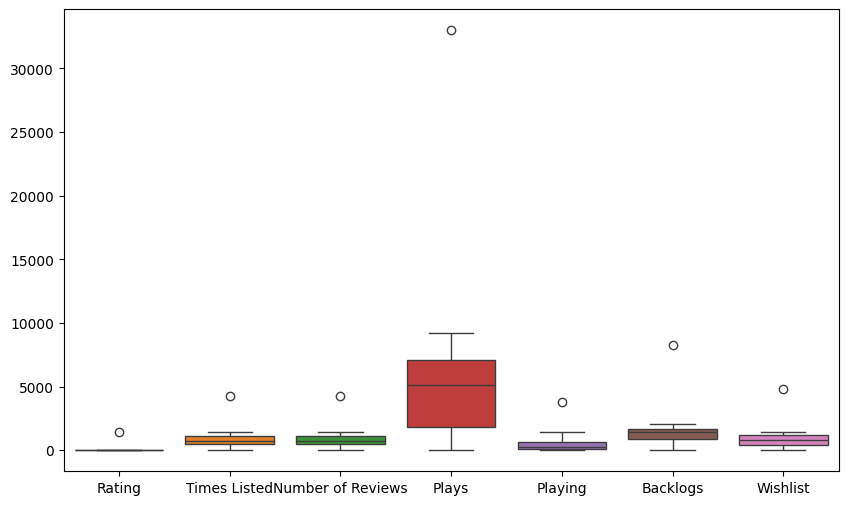

In [120]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=boxplots, ax=ax)

In [121]:
#the dataframe seems to have possible outliers and the different numeric columns are all on very different scales
# so I first check the plays column for games past the upper whisker
lots_of_plays = games[games['Plays'] > 15000]
print(lots_of_plays)

                                       Title Release Date   
0                                 Elden Ring   2022-02-25  \
1                                      Hades   2019-12-10   
2    The Legend of Zelda: Breath of the Wild   2017-03-03   
3                                  Undertale   2015-09-15   
4                              Hollow Knight   2017-02-24   
..                                       ...          ...   
877                            Borderlands 2   2012-09-18   
891                            Rocket League   2015-07-06   
896                               Wii Sports   2006-11-19   
898                           Mario Kart Wii   2008-04-10   
910                          Pokémon Emerald   2004-09-16   

                                                  Team  Rating  Times Listed   
0       ['Bandai Namco Entertainment', 'FromSoftware']     4.5          3900  \
1                                 ['Supergiant Games']     4.3          2900   
2    ['Nintendo', 'Nintendo

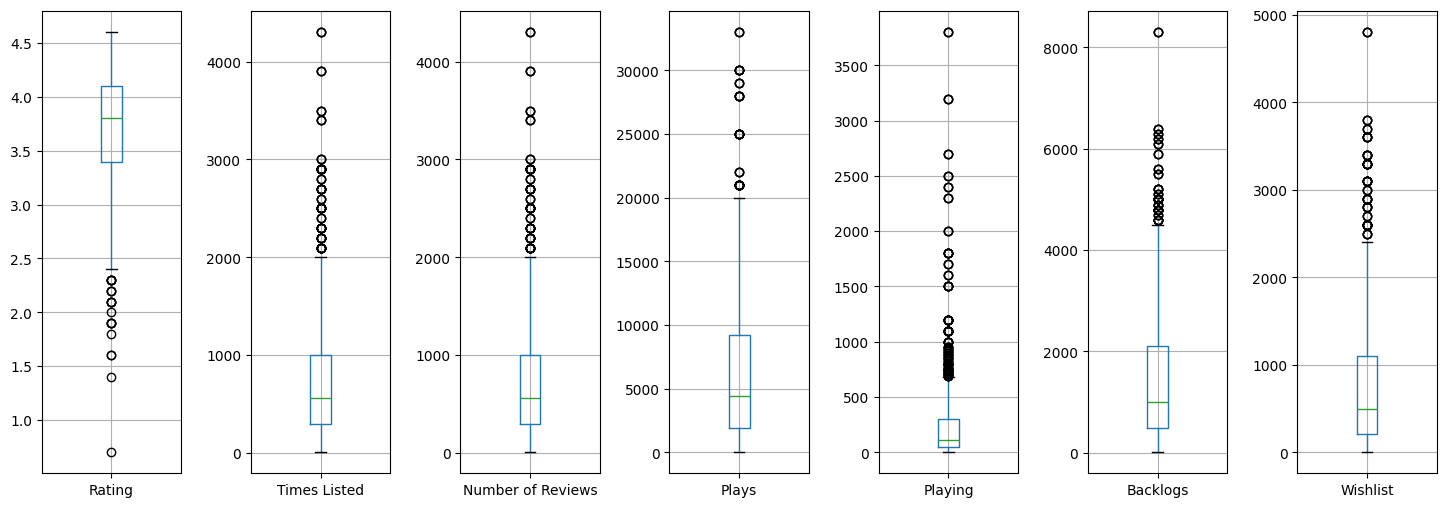

In [122]:
# subplots in one row instead of one plot with different boxplots
fig, ax = plt.subplots(1, 7, figsize=(18, 6))

# draw boxplots - for one column in each subplot
games.boxplot('Rating', ax=ax[0])
games.boxplot('Times Listed', ax=ax[1])
games.boxplot('Number of Reviews', ax=ax[2])
games.boxplot('Plays', ax=ax[3])
games.boxplot('Playing', ax=ax[4])
games.boxplot('Backlogs', ax=ax[5])
games.boxplot('Wishlist', ax=ax[6])

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [123]:
#the further examinations show that those datapoints probably aren't any outliers, but rather very popular games that differ from the majority of the games in the data set
#that's probably why (except for rating) the median points for all the other numeric columns are on the lower end of each plot, yet there are many datapoints outside the upper whisker
#(those are the fewer games that are the most popular)

In [124]:
#now let's look at games per year
# extracting the year from the 'Release Date' column and convert it to an integer
year = games['Release Date'].dt.year.astype('Int64')

#i'm gonna create a new dataFrame with the year and the count of games for each year
games_by_year = year.value_counts().reset_index()
games_by_year.columns = ['Year', 'Number_of_Games']
games_by_year = games_by_year.sort_values(by='Year')
print(games_by_year)

    Year  Number_of_Games
37  1980                1
39  1982                1
38  1985                1
35  1986                4
36  1987                3
34  1988                5
33  1989                5
32  1990                6
30  1991               11
31  1992                6
28  1993               12
29  1994               11
27  1995               12
25  1996               15
23  1997               18
24  1998               16
21  1999               25
26  2000               15
19  2001               30
22  2002               22
20  2003               26
17  2004               37
15  2005               41
18  2006               32
13  2007               50
14  2008               44
16  2009               40
11  2010               58
12  2011               50
9   2012               60
8   2013               68
10  2014               59
6   2015               73
4   2016               75
7   2017               70
3   2018               77
2   2019               87
5   2020    

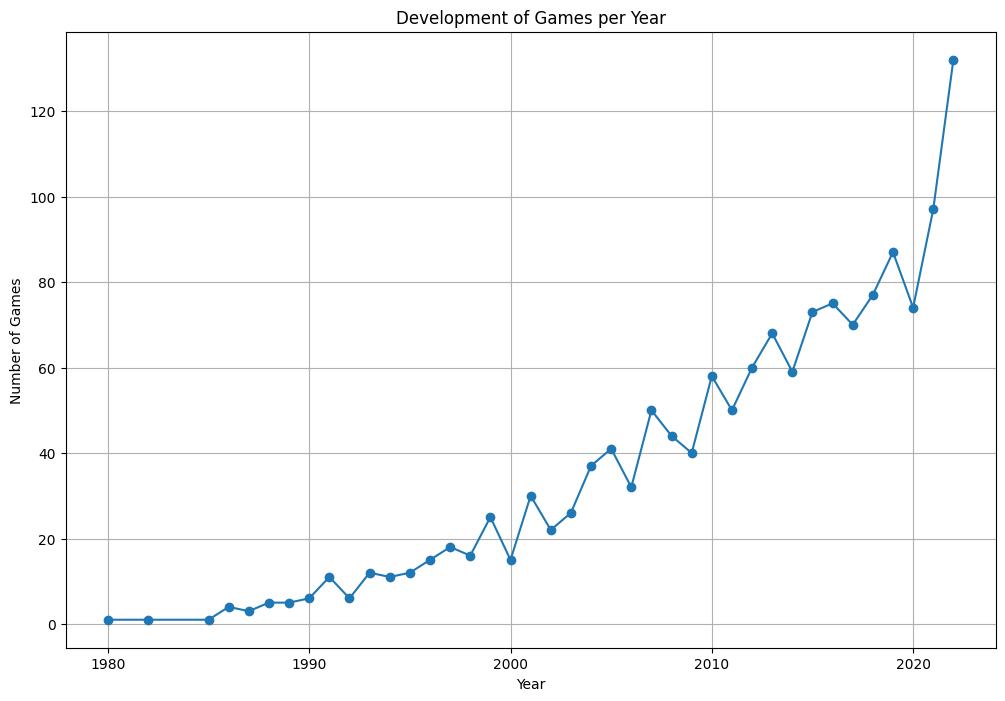

In [125]:
#now i'm plotting it as a line graph to show the development over the years
plt.figure(figsize=(12, 8))
plt.plot(games_by_year['Year'], games_by_year['Number_of_Games'], marker='o')

plt.title('Development of Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

In [126]:
#i wanna look at all of the games that are RPGs so how do I call them from the Genre column and extract the relevant data to a new dataframe?
rpg_games = games[games['Genres'].apply(lambda genres: 'RPG' in genres)]
rpg_games


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
6,Omori,2020-12-25,"['OMOCAT', 'PLAYISM']",4.2,1600,1600,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7200,1100,4500,3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Lisa the Joyful,2015-08-24,['Dingaling'],3.7,126,126,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",Traverse the world as Buddy. Stake your claim ...,"[""This is essentially just a dungeon crawler a...",1000,7,358,233
1489,Kingdoms of Amalur: Reckoning,2012-02-07,"['38 Studios', 'Electronic Arts']",3.2,99,99,"['Brawler', 'RPG']","Kingdoms of Amalur: Reckoning is an epic, open...","[""As the first RPG that introduced me to the g...",1200,22,365,106
1500,Children of Morta,2019-09-03,"['Dead Mage', '11 bit studios']",3.4,153,153,"['Adventure', 'Indie', 'RPG']",Children of Morta is a narrative driven hack a...,"[""It's a reasonably solid rogue-lite RPG. The ...",727,54,385,136
1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100,45,487,206


In [127]:
#one idea for the final would be to look at indie games compared to big publisher games
indie_games = games[games['Genres'].apply(lambda genres: 'Indie' in genres)]
print(indie_games)
publisher_games = games[games['Genres'].apply(lambda genres: 'Indie' not in genres)]
print(publisher_games)

                                       Title Release Date   
1                                      Hades   2019-12-10  \
3                                  Undertale   2015-09-15   
4                              Hollow Knight   2017-02-24   
6                                      Omori   2020-12-25   
8                                   Among Us   2018-06-15   
...                                      ...          ...   
1467                               La-Mulana   2012-07-13   
1480                  The Jackbox Party Pack   2014-11-18   
1485  Ruined King: A League of Legends Story   2021-11-16   
1487                         Lisa the Joyful   2015-08-24   
1500                       Children of Morta   2019-09-03   

                                      Team  Rating  Times Listed   
1                     ['Supergiant Games']     4.3          2900  \
3                       ['tobyfox', '8-4']     4.2          3500   
4                          ['Team Cherry']     4.4          300

In [128]:
#those three dataframes seems a bit random, but I would maybe like to work with them later on
#let's say I developed a new RPG game and I want to look at the titles and summaries of popular games to generate my own
#what about the popularity of indie games vs. publisher games? differences in playernumbers and ratings, maybe a sentiment analysis of the ratings?

In [129]:
#what are the most popular genres in the dataset?
#we clean the column and then split it at the comma
all_genres = [genre.strip("[]'") for genres_string in games['Genres'].apply(lambda x: x if pd.isna(x) else x.replace("'", "")) for genre in genres_string.split(',')]

#making a new datafrae with the count of each genre
genres_counts = pd.Series(all_genres).value_counts().reset_index()
genres_counts.columns = ['Genre', 'Number_of_Games_in_Genre']

# Display the resulting DataFrame
print(genres_counts)

                   Genre  Number_of_Games_in_Genre
0              Adventure                       980
1                    RPG                       408
2               Platform                       275
3                Shooter                       263
4                  Indie                       227
5                 Puzzle                       161
6               Strategy                       137
7                Brawler                       115
8              Simulator                       109
9    Turn Based Strategy                        96
10                   RPG                        91
11               Shooter                        81
12          Visual Novel                        68
13                 Indie                        51
14                Arcade                        50
15              Platform                        47
16              Tactical                        47
17              Fighting                        46
18       Point-and-Click       

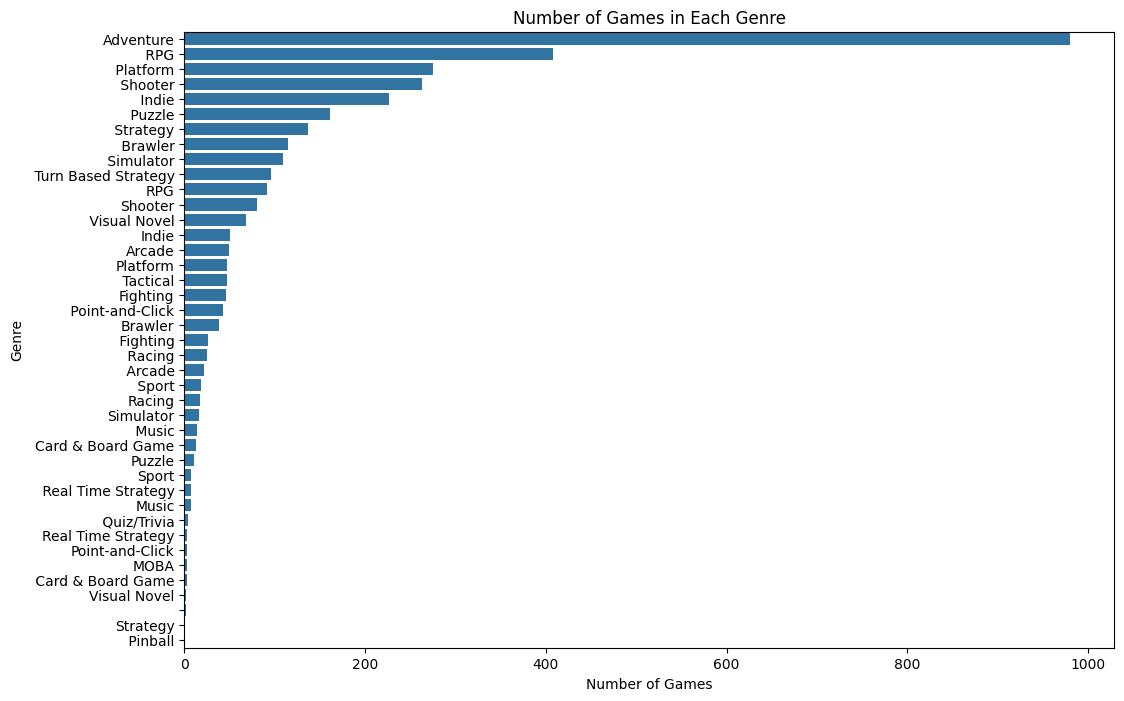

In [130]:
#visualizing the genres as a barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Number_of_Games_in_Genre', y='Genre', data=genres_counts, legend=False)

plt.title('Number of Games in Each Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

In [131]:
print(genres_counts.describe())
sum_genres = genres_counts['Number_of_Games_in_Genre'].sum()
print('the countsum of genres in the dataset is', sum_genres)


       Number_of_Games_in_Genre
count                 41.000000
mean                  86.292683
std                  168.421977
min                    1.000000
25%                    7.000000
50%                   26.000000
75%                   91.000000
max                  980.000000
the countsum of genres in the dataset is 3538


In [134]:
# extracting individual teams
games['Team'] = games['Team'].apply(lambda x: eval(x) if not pd.isna(x) else [])
all_teams = [team.strip() for teams_list in games['Team'] for team in teams_list]

# creating a DataFrame with the teams and their counts
team_counts = pd.Series(all_teams).value_counts().reset_index()
team_counts.columns = ['Team', 'Number_of_Games_by_Team']
team_counts

,Team,Number_of_Games_by_Team
0,Nintendo,240
1,Capcom,89
2,Square Enix,75
3,Sega,62
4,Electronic Arts,54
...,...,...
643,Project Sora,1
644,Striking Distance Studios,1
645,Krafton,1
646,Whippoorwill,1


In [136]:
print(team_counts.describe())
sum_teams = team_counts['Team'].count()
print('the number of teams in the dataset is', sum_teams)

       Number_of_Games_by_Team
count               648.000000
mean                  4.075617
std                  11.947806
min                   1.000000
25%                   1.000000
50%                   2.000000
75%                   3.000000
max                 240.000000
the number of teams in the dataset is 648


In [137]:
#then i filtered the dataframe to minimize it a bit in order to plot it
filtered_team_counts = team_counts[team_counts['Number_of_Games_by_Team'] > 5]

# Display the resulting DataFrame
print(filtered_team_counts)

                                   Team  Number_of_Games_by_Team
0                              Nintendo                      240
1                                Capcom                       89
2                           Square Enix                       75
3                                  Sega                       62
4                       Electronic Arts                       54
..                                  ...                      ...
79                 Take-Two Interactive                        6
80  Konami Computer Entertainment Japan                        6
81                         Nihon Falcom                        6
82             Nintendo EAD Group No. 2                        6
83                      Guerrilla Games                        6

[84 rows x 2 columns]


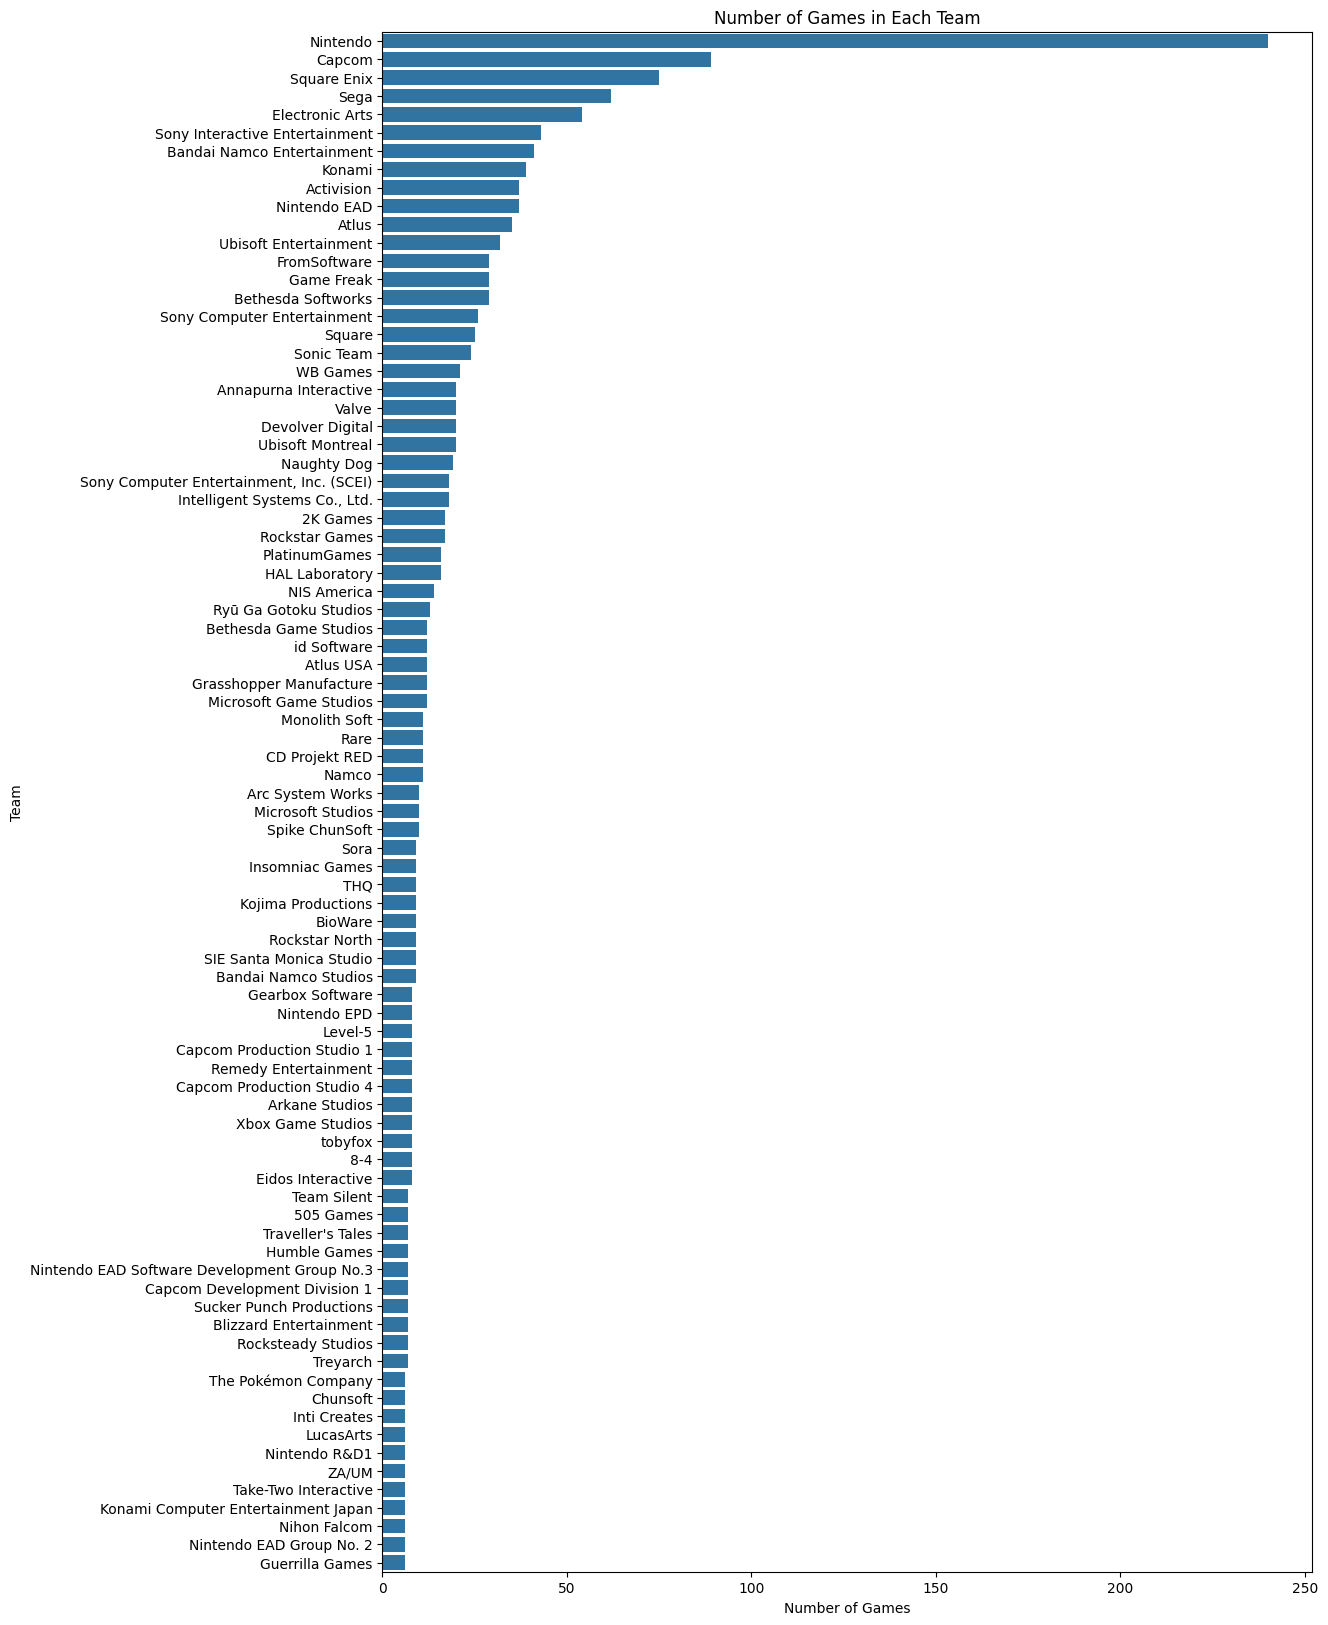

In [138]:
# teams plot
plt.figure(figsize=(12, 20))
sns.barplot(x='Number_of_Games_by_Team', y='Team', data=filtered_team_counts, legend=False)

plt.title('Number of Games in Each Team')
plt.xlabel('Number of Games')
plt.ylabel('Team')
plt.show()

In [139]:
#many companies that belong  together --> extra table for that? how do I group them together?
#number of videogames per country
#get a table with all the Teams/companies and their countries
#webscraping the seats of the companies, city/country
#to maybe make a map with geopandas?

In [140]:
#the reviews are also kinda not stored properly, so I decided to use regex splitting on a string to extract the single reviews and connect them to their game ID
# converting to string
games['Reviews'] = games['Reviews'].astype(str)

# adding an explicit ID with the index
games['GameID'] = games.index

# splitting and then exploding
reviews_data = games[['GameID', 'Reviews', 'Genres']].assign(Reviews=games['Reviews'].str.split("', '"))
reviews_data = reviews_data.explode('Reviews')

# stripping to clean the reviews up
reviews_data['Reviews'] = reviews_data['Reviews'].str.strip('[]"')
reviews_data['Reviews'] = reviews_data['Reviews'].str.strip("'")

print(reviews_data)

      GameID                                            Reviews   
0          0  The first playthrough of elden ring is one of ...  \
0          0  The game is absolutely beautiful, with so much...   
0          0  Took everything great about the Soulsborne gam...   
0          0  I play with my overlevelled friend every time ...   
1          1  convinced this is a roguelike for people who d...   
...      ...                                                ...   
1511    1511   Pretty Average Lego Game But It Was My Childhood   
1511    1511                                      pog lego game   
1511    1511  Pretty decent lego game! Loved the attention t...   
1511    1511                                              Class   
1511    1511                 TT Games got crunch time for this.   

                                        Genres  
0                         ['Adventure', 'RPG']  
0                         ['Adventure', 'RPG']  
0                         ['Adventure', 'RPG']  

C:\Users\matte\AppData\Local\Temp\ipykernel_2312\296687017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['Reviews'] = games['Reviews'].astype(str)
C:\Users\matte\AppData\Local\Temp\ipykernel_2312\296687017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['GameID'] = games.index


In [141]:
#check if we have any null reviews in the table from the conversion
nullreviews = reviews_data[reviews_data['Reviews'].isnull()]
nullreviews

,GameID,Reviews,Genres


In [142]:
indie_reviews = reviews_data[reviews_data['Genres'].apply(lambda genres: 'Indie' in genres)]
indie_reviews

,GameID,Reviews,Genres
1,1,convinced this is a roguelike for people who d...,"['Adventure', 'Brawler', 'Indie', 'RPG']"
1,1,"incredible art, a banger soundtrack a surprisi...","['Adventure', 'Brawler', 'Indie', 'RPG']"
3,3,soundtrack is tied for #1 with nier automata. ...,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
3,3,"Just play this game, Dont look at any of these...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
3,3,Não há palavras que deem para descrever a expe...,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
...,...,...,...
1485,1485,"Puzzles are fun, ability trees allow for numer...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
1487,1487,This is essentially just a dungeon crawler and...,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
1487,1487,"The Last Of Us Part 2 if it was good', ""a few ...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
1500,1500,It's a reasonably solid rogue-lite RPG. The st...,"['Adventure', 'Indie', 'RPG']"


In [143]:
#there are some reviews in the dataframe that aren't english
#so I use langdetect to detect the language of the reviews
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
    
reviews_data['Language'] = reviews_data['Reviews'].apply(detect_language)
print(reviews_data)

      GameID                                            Reviews   
0          0  The first playthrough of elden ring is one of ...  \
0          0  The game is absolutely beautiful, with so much...   
0          0  Took everything great about the Soulsborne gam...   
0          0  I play with my overlevelled friend every time ...   
1          1  convinced this is a roguelike for people who d...   
...      ...                                                ...   
1511    1511   Pretty Average Lego Game But It Was My Childhood   
1511    1511                                      pog lego game   
1511    1511  Pretty decent lego game! Loved the attention t...   
1511    1511                                              Class   
1511    1511                 TT Games got crunch time for this.   

                                        Genres Language  
0                         ['Adventure', 'RPG']       en  
0                         ['Adventure', 'RPG']       en  
0                    

In [144]:
sum_languages = reviews_data['Language'].value_counts().reset_index()
sum_languages.columns = ['Language', 'Count']
sum_languages

,Language,Count
0,en,4011
1,pt,587
2,es,184
3,tr,64
4,de,51
5,af,49
6,it,47
7,ro,42
8,so,38
9,tl,32


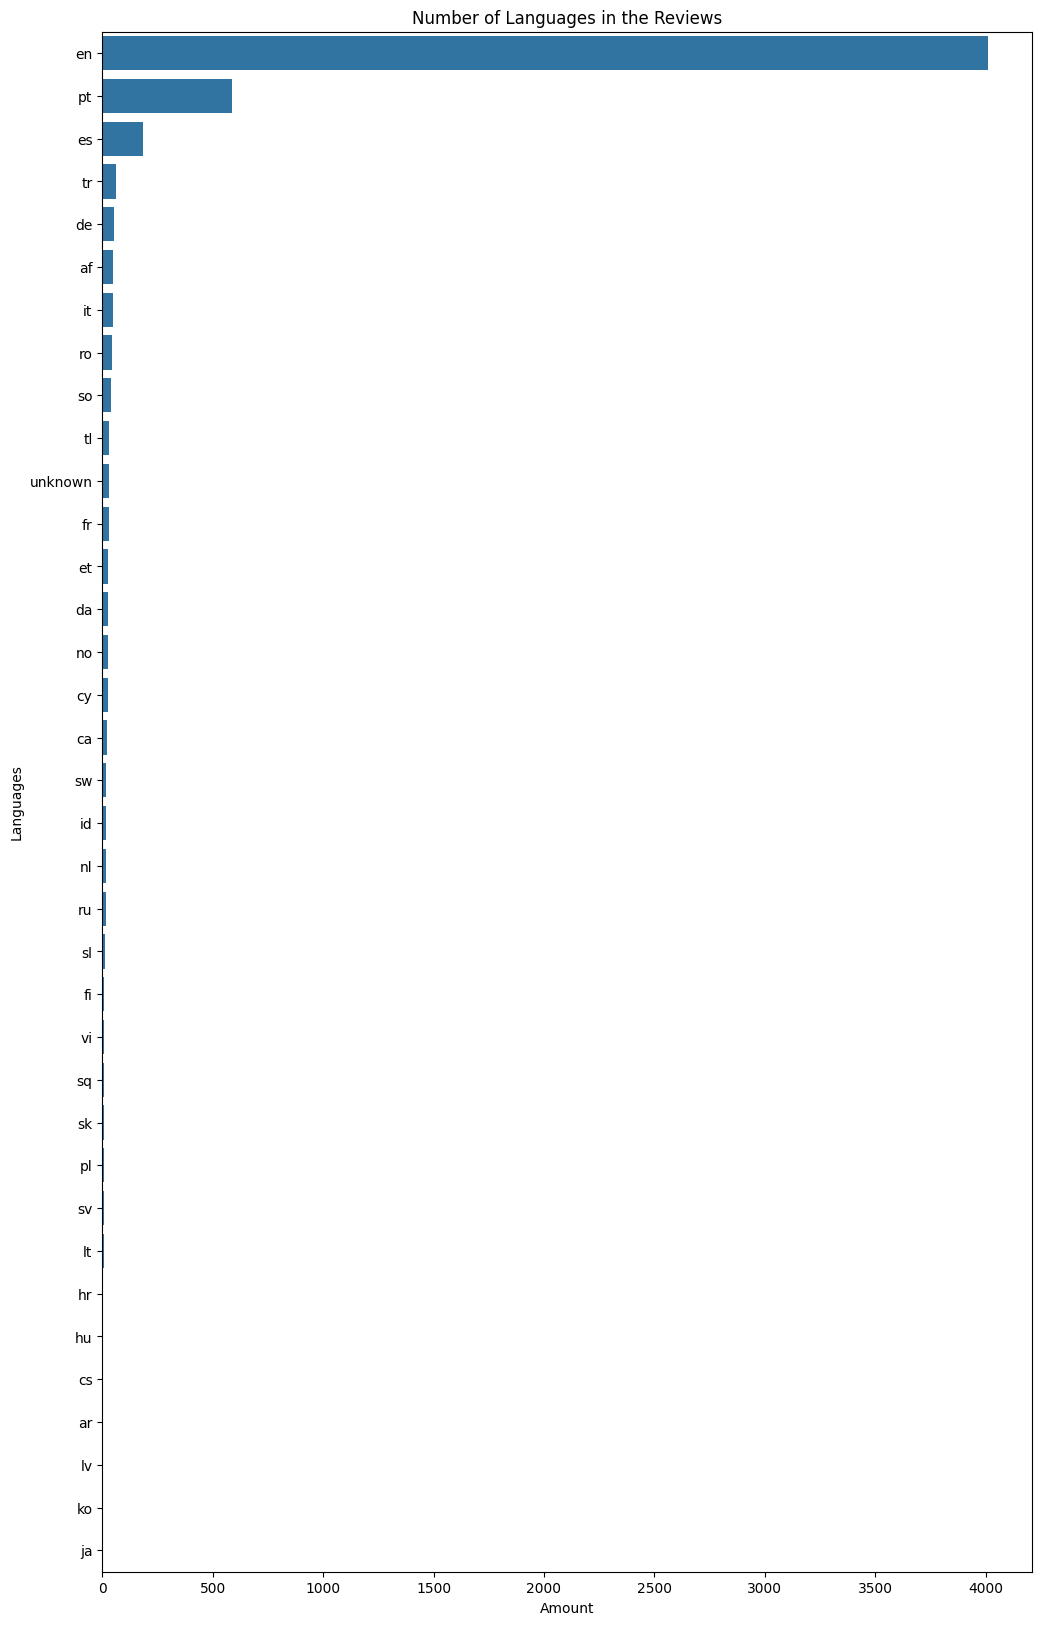

In [145]:
# language in reviews plot
plt.figure(figsize=(12, 20))
sns.barplot(x='Count', y='Language', data=sum_languages, legend=False)

plt.title('Number of Languages in the Reviews')
plt.xlabel('Amount')
plt.ylabel('Languages')
plt.show()

In [147]:
#translation via DeepL and openai for the languages that aren't english
#use the output for different NLP processes (TBD in the next steps)
#wordclouds of highest count words in different genre summaries?
#maybe a sentiment analysis for indie vs big publisher games
#using the summaries and reviews of different genres to write new summaries/reviews for games